# Loading Libraries

In [58]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt

In [59]:
import IPython.display as ipd

In [60]:
from matplotlib.pyplot import specgram

In [61]:
import librosa
import librosa.display

# Loading Prepared Dataset (CSV-file)

In [62]:
File = pd.read_csv("/content/drive/MyDrive/New_Dataset/SAVEE/Dataset_Details.csv")

In [63]:
File.head()

,Emotions,Path
0,happiness,/content/drive/MyDrive/New_Dataset/SAVEE/ALL/J...
1,neutral,/content/drive/MyDrive/New_Dataset/SAVEE/ALL/J...
2,fear,/content/drive/MyDrive/New_Dataset/SAVEE/ALL/D...
3,disgust,/content/drive/MyDrive/New_Dataset/SAVEE/ALL/J...
4,disgust,/content/drive/MyDrive/New_Dataset/SAVEE/ALL/J...


In [64]:
# Happy Emotion
ipd.Audio(File["Path"][4])

In [65]:
# Sad Emotion
ipd.Audio(File["Path"][1])

### Create WavePlot

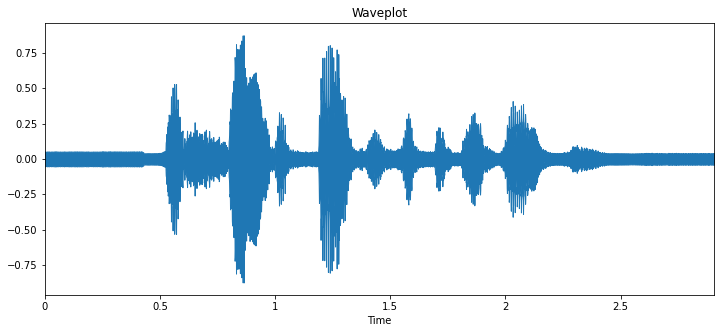

In [66]:
data, sr = librosa.load(File["Path"][1])
plt.figure(figsize=(12, 5))
librosa.display.waveplot(data, sr=sr)
plt.title('Waveplot')

# Audio 
ipd.Audio(File["Path"][1])

### CREATE LOG MEL SPECTROGRAM

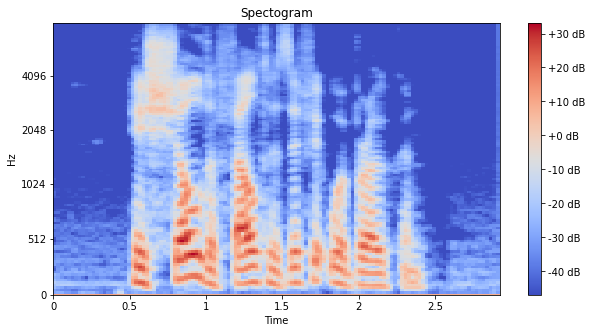

In [67]:
data, sr = librosa.load(File["Path"][1])

plt.figure(figsize=(10, 5))
spectrogram = librosa.feature.melspectrogram(y=data, sr=sr, n_mels=128,fmax=8000) 
spectrogram = librosa.power_to_db(spectrogram)
librosa.display.specshow(spectrogram, y_axis='mel', fmax=8000, x_axis='time');
plt.title('Spectogram')
plt.colorbar(format='%+2.0f dB');

### Create MFCC (Mel Frequency Cepstral Coefficients) feature

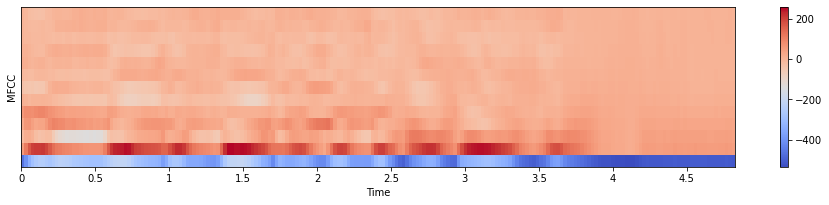

In [68]:
X, sample_rate = librosa.load(File["Path"][1], res_type='kaiser_fast',duration=2.5,sr=22050*2,offset=0.5)  
mfcc = librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=13)


# MFCC
plt.figure(figsize=(16, 10))
plt.subplot(3,1,1)
librosa.display.specshow(mfcc, x_axis='time')
plt.ylabel('MFCC')
plt.colorbar()

# Extracting features (melspectrogram)




In [69]:
data, sample_rate = librosa.load(File["Path"][1], duration=2.5, offset=0.6)

In [70]:
res1 = np.mean(librosa.feature.melspectrogram(y=data, sr=sample_rate).T, axis=0)

In [71]:
res1                       # Features

array([6.51917124e+00, 3.98295224e-02, 2.15730608e-01, 2.08791971e+00,
       6.64935303e+00, 4.39766645e+00, 4.60381556e+00, 5.25681353e+00,
       4.08896065e+00, 6.49654770e+00, 6.54538107e+00, 2.84314704e+00,
       1.05593901e+01, 1.33991995e+01, 4.96874504e+01, 3.55188026e+01,
       1.30920687e+01, 7.20425129e+00, 7.90903568e+00, 4.58180084e+01,
       3.52450066e+01, 2.29498920e+01, 9.50845718e+00, 2.11214886e+01,
       1.87066269e+01, 5.44559383e+00, 3.22160816e+00, 1.09108245e+00,
       1.21873498e+00, 1.84747601e+00, 1.98404098e+00, 5.79213917e-01,
       1.15556145e+00, 1.40581548e+00, 9.90000784e-01, 1.18008554e+00,
       1.68073475e+00, 1.42437243e+00, 1.45904851e+00, 1.91652441e+00,
       8.19558084e-01, 2.94147044e-01, 8.39574456e-01, 4.84305352e-01,
       2.06273675e-01, 2.93314815e-01, 8.89196098e-01, 1.82886392e-01,
       1.08139589e-01, 2.02518940e-01, 1.46427035e-01, 1.89195685e-02,
       9.79835726e-03, 2.79442333e-02, 1.32614495e-02, 3.71630793e-03,
      

In [72]:
File["Emotions"][1]               # Label

'neutral'

# Extracting features (Mel Frequency Cepstral Coefficients)



In [73]:
data, sample_rate = librosa.load(File["Path"][1], duration=2.5, offset=0.6)

In [74]:
res1 = np.mean(librosa.feature.mfcc(y=data, sr=sample_rate).T, axis=0)

In [75]:
res1                     # Features

array([-3.3143552e+02,  1.1817369e+02,  2.4990873e+01,  4.1052074e+01,
       -1.2221044e+01, -3.0603623e+00,  1.7382451e+00, -2.5205474e+00,
       -1.4023125e+01, -3.2707801e+00,  8.0397475e-01, -3.8310769e+00,
       -2.5926511e+00, -2.7471786e+00,  6.1663032e+00,  3.2134814e+00,
       -2.5454438e-01,  3.3525276e-01,  5.0426257e-01, -3.2011962e+00],
      dtype=float32)

In [76]:
File["Emotions"][1]               # Label

'neutral'

# Data Augmentation
## Noise, Stretch, Pitch

In [77]:
# NOISE
def noise(data):
    noise_amp = 0.035*np.random.uniform()*np.amax(data)
    data = data + noise_amp*np.random.normal(size=data.shape[0])
    return data
# STRETCH
def stretch(data, rate=0.8):
    return librosa.effects.time_stretch(data, rate)
# PITCH
def pitch(data, sampling_rate, pitch_factor=0.7):
    return librosa.effects.pitch_shift(data, sampling_rate, pitch_factor)

In [78]:
# Trying different functions
path = np.array(File['Path'])[3]
data, sample_rate = librosa.load(path)

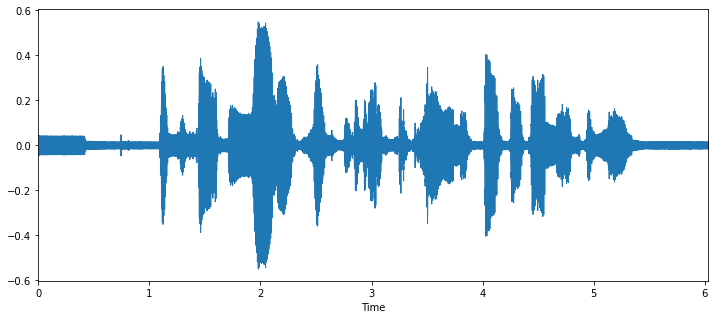

In [79]:
# Normal Audio
plt.figure(figsize=(12, 5))
librosa.display.waveplot(y=data, sr=sample_rate)
ipd.Audio(path)

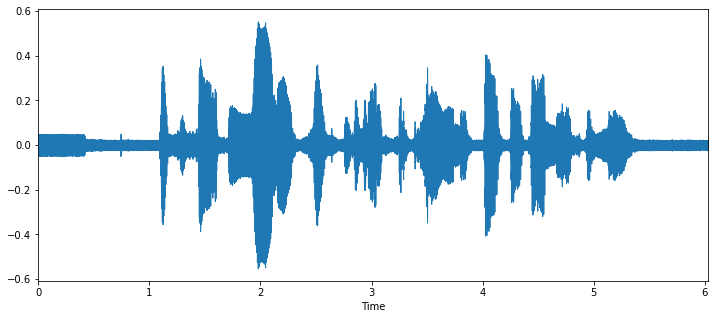

In [80]:
# Noise
x = noise(data)
plt.figure(figsize=(12,5))
librosa.display.waveplot(y=x, sr=sample_rate)
ipd.Audio(x, rate=sample_rate)

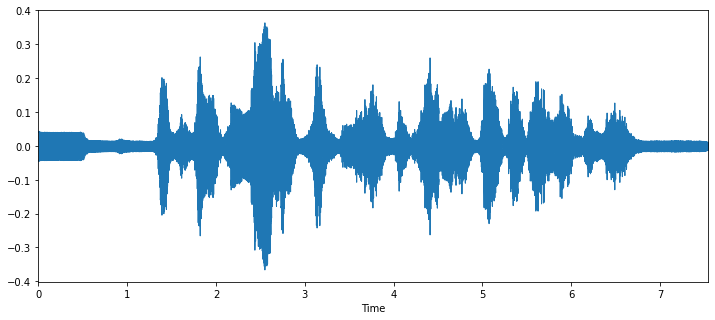

In [81]:
# Stretch
x = stretch(data)
plt.figure(figsize=(12, 5))
librosa.display.waveplot(y=x, sr=sample_rate)
ipd.Audio(x, rate=sample_rate)

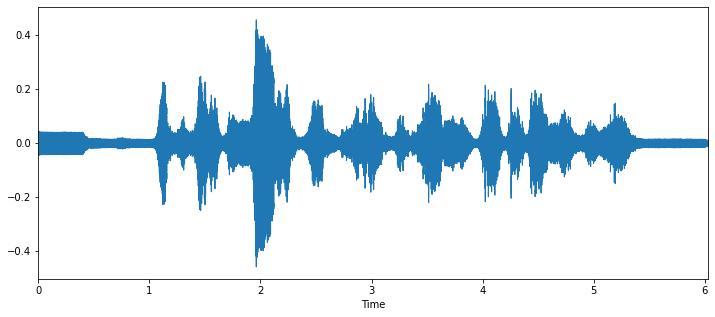

In [82]:
# Pitch
x = pitch(data, sample_rate)
plt.figure(figsize=(12, 5))
librosa.display.waveplot(y=x, sr=sample_rate)
ipd.Audio(x, rate=sample_rate)

### Melspectrogram

In [83]:
def feat_ext_spect(data):
    mfcc = np.mean(librosa.feature.melspectrogram(y=data, sr=sample_rate).T, axis=0)
    return mfcc

def get_feat_spect(path):
    data, sample_rate = librosa.load(path, duration=2.5, offset=0.6)
    # normal data
    res1 = feat_ext_spect(data)
    result = np.array(res1)
    #data with noise
    noise_data = noise(data)
    res2 = feat_ext_spect(noise_data)
    result = np.vstack((result, res2))
    #data with stretch and pitch
    new_data = stretch(data)
    data_stretch_pitch = pitch(new_data, sample_rate)
    res3 = feat_ext_spect(data_stretch_pitch)
    result = np.vstack((result, res3))
    return result

In [84]:
X, Y = [], []
for path, emotion in zip(File['Path'], File['Emotions']):
    feature = get_feat_spect(path)
    for ele in feature:
        X.append(ele)
        Y.append(emotion)

Features_Melspectrogram = pd.DataFrame(X)
Features_Melspectrogram['labels'] = Y
Features_Melspectrogram.to_csv('/content/drive/MyDrive/Project/Outputs/SAVEE_Features_Melspectrogram.csv', index=False)
Features_Melspectrogram.head()

,0,1,2,3,4,5,6,7,8,9,...,119,120,121,122,123,124,125,126,127,labels
0,0.891084,0.033806,0.033111,0.595869,9.659194,21.865084,14.657446,26.055956,48.188286,57.217628,...,0.000140,0.000108,0.000077,0.000066,0.000046,0.000042,0.000036,0.000017,0.000009,happiness
1,0.883836,0.041088,0.037784,0.593182,9.686447,21.914926,14.645248,26.142101,48.237524,57.354537,...,0.005662,0.005638,0.005201,0.005402,0.005304,0.005403,0.005472,0.005438,0.005566,happiness
2,0.356943,0.011757,0.007314,0.051174,0.729597,2.490874,2.375560,8.371264,14.972178,12.979292,...,0.000101,0.000047,0.000028,0.000017,0.000016,0.000012,0.000008,0.000007,0.000006,happiness
3,6.519171,0.039830,0.215731,2.087920,6.649353,4.397666,4.603816,5.256814,4.088961,6.496548,...,0.000006,0.000003,0.000002,0.000002,0.000002,0.000002,0.000003,0.000003,0.000003,neutral
4,6.527477,0.043517,0.227176,2.087866,6.680743,4.411577,4.607005,5.279030,4.084499,6.485992,...,0.005408,0.005581,0.005139,0.005251,0.004844,0.005448,0.005718,0.005173,0.005255,neutral


### MFCC (Mel Frequency Cepstral Coefficients)

In [85]:
def feat_ext_mfcc(data):
    mfcc = np.mean(librosa.feature.mfcc(y=data, sr=sample_rate).T, axis=0)
    return mfcc

def get_feat_mfcc(path):
    data, sample_rate = librosa.load(path, duration=2.5, offset=0.6)
    # normal data
    res1 = feat_ext_mfcc(data)
    result = np.array(res1)
    #data with noise
    noise_data = noise(data)
    res2 = feat_ext_mfcc(noise_data)
    result = np.vstack((result, res2))
    #data with stretch and pitch
    new_data = stretch(data)
    data_stretch_pitch = pitch(new_data, sample_rate)
    res3 = feat_ext_mfcc(data_stretch_pitch)
    result = np.vstack((result, res3))
    return result

In [86]:
X, Y = [], []
for path, emotion in zip(File['Path'], File['Emotions']):
    feature = get_feat_mfcc(path)
    for ele in feature:
        X.append(ele)
        Y.append(emotion)

Features_MFCC = pd.DataFrame(X)
Features_MFCC['labels'] = Y
Features_MFCC.to_csv('/content/drive/MyDrive/Project/Outputs/SAVEE_Features_MFCC.csv', index=False)
Features_MFCC.head()

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,labels
0,-200.344635,116.885246,-14.814376,31.010330,-17.759123,-16.385727,-10.251357,-10.284333,-23.786430,-2.468860,...,-6.759806,-1.404577,-7.749061,4.514760,-4.319347,-6.798388,-0.937824,-4.859028,-7.378529,happiness
1,-62.475932,48.637505,9.517436,5.340141,-5.759606,-12.661579,-8.796404,-11.549958,-13.798119,-6.140592,...,-4.206547,-2.314351,-2.179775,0.579657,-1.062905,-3.690998,-0.694773,-2.736857,-5.915788,happiness
2,-247.406677,112.386932,-16.230049,27.781887,-21.403309,-15.726805,-13.831937,-14.567476,-24.053555,-0.712481,...,-6.260937,-3.008468,-6.202703,4.378581,-8.834075,-5.402733,-0.284534,-6.594661,-6.448785,happiness
3,-331.435516,118.173691,24.990873,41.052074,-12.221044,-3.060362,1.738245,-2.520547,-14.023125,-3.270780,...,-3.831077,-2.592651,-2.747179,6.166303,3.213481,-0.254544,0.335253,0.504263,-3.201196,neutral
4,-132.771742,33.779878,19.547569,13.921809,0.453420,-3.433968,-0.292869,-2.162649,-5.382371,-4.226673,...,-1.666211,0.713820,1.140908,1.491472,2.085476,1.217994,1.378721,-0.019355,-0.029634,neutral


### MelSpectogram + MFCC

In [87]:
X, Y = [], []
for path, emotion in zip(File['Path'], File['Emotions']):
    feature_Melspectrogram = get_feat_spect(path)
    feature_MFCC = get_feat_mfcc(path)
    res = np.concatenate((feature_Melspectrogram, feature_MFCC), axis=1) 
    for ele in res:
        X.append(ele)
        Y.append(emotion)

Features_Combined = pd.DataFrame(X)
Features_Combined['labels'] = Y
Features_Combined.to_csv('/content/drive/MyDrive/Project/Outputs/SAVEE_Features_Combined.csv', index=False)
Features_Combined.head()

,0,1,2,3,4,5,6,7,8,9,...,139,140,141,142,143,144,145,146,147,labels
0,0.891084,0.033806,0.033111,0.595869,9.659194,21.865084,14.657446,26.055956,48.188286,57.217628,...,-6.759806,-1.404577,-7.749061,4.514760,-4.319347,-6.798388,-0.937824,-4.859028,-7.378529,happiness
1,0.992510,0.115383,0.112897,0.717496,9.752404,21.812602,14.762177,25.633570,47.725031,57.208579,...,-5.024803,-2.298325,-2.466918,0.868460,-0.779749,-3.724901,-1.261653,-3.115248,-5.149849,happiness
2,0.356943,0.011757,0.007314,0.051174,0.729597,2.490874,2.375560,8.371264,14.972178,12.979292,...,-6.260937,-3.008468,-6.202703,4.378581,-8.834075,-5.402733,-0.284534,-6.594661,-6.448785,happiness
3,6.519171,0.039830,0.215731,2.087920,6.649353,4.397666,4.603816,5.256814,4.088961,6.496548,...,-3.831077,-2.592651,-2.747179,6.166303,3.213481,-0.254544,0.335253,0.504263,-3.201196,neutral
4,6.535304,0.046004,0.225987,2.107937,6.652501,4.382972,4.595917,5.254234,4.103537,6.491094,...,-1.614392,0.377876,1.045155,1.378320,1.521758,0.945729,1.950349,1.057234,-0.017693,neutral
